In [46]:
!pip install statsmodels --upgrade

In [47]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
df = pd.read_csv('C:\\Users\\HP\\Desktop\\project1\\sampledatamonthly1.csv')

In [50]:
df.columns = ['Date', 'Actuals']

In [51]:
df.head(10)

,Date,Actuals
0,01-07-2018,123739.76
1,01-08-2018,119569.00
2,01-09-2018,110460.71
3,01-10-2018,135560.57
4,01-11-2018,120747.70
5,01-12-2018,125897.00
6,01-01-2019,108474.45
7,01-02-2019,96280.60
8,01-03-2019,119753.10
9,01-04-2019,117437.55


In [52]:
df.set_index('Date', inplace=True)

In [53]:
df.index

Index(['01-07-2018', '01-08-2018', '01-09-2018', '01-10-2018', '01-11-2018',
       '01-12-2018', '01-01-2019', '01-02-2019', '01-03-2019', '01-04-2019',
       '01-05-2019', '01-06-2019', '01-07-2019', '01-08-2019', '01-09-2019',
       '01-10-2019', '01-11-2019', '01-12-2019', '01-01-2020', '01-02-2020',
       '01-03-2020', '01-04-2020', '01-05-2020', '01-06-2020', '01-07-2020',
       '01-08-2020', '01-09-2020', '01-10-2020', '01-11-2020', '01-12-2020',
       '01-01-2021', '01-02-2021', '01-03-2021', '01-04-2021', '01-05-2021',
       '01-06-2021', '01-07-2021', '01-08-2021', '01-09-2021', '01-10-2021',
       '01-11-2021', '01-12-2021', '01-01-2022', '01-02-2022', '01-03-2022',
       '01-04-2022', '01-05-2022', '01-06-2022'],
      dtype='object', name='Date')

In [54]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Actuals,48.0,202257.384375,135257.440084,52049.47,110255.615,125017.45,264221.2125,713391.82


<AxesSubplot:xlabel='Date'>

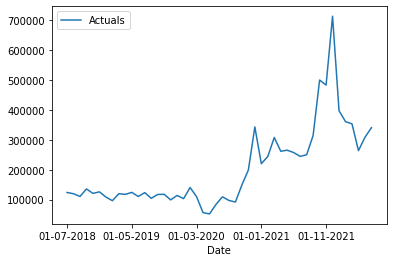

In [55]:
df.plot()

In [41]:
#Check for Stationarity
from statsmodels.tsa.stattools import adfuller

In [56]:
#define a statistic function
def ad_test(dataset):
     datasettest = adfuller(df, autolag = 'AIC')
     print("1. ADF : ",datasettest[0])
     print("2. P-Value : ", datasettest[1])
     print("3. Num Of Lags : ", datasettest[2])
     print("4. Num Of Observations Used For ADF Regression:",      datasettest[3])
     print("5. Critical Values :")
     for key, val in datasettest[4].items():
         print("\t",key, ": ", val)

In [57]:
#compute Value
ad_test(df['Actuals'])

1. ADF :  -1.8465493359205636
2. P-Value :  0.35760818387285986
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 47
5. Critical Values :
	 1% :  -3.5778480370438146
	 5% :  -2.925338105429433
	 10% :  -2.6007735310095064


In [ ]:
As the p Value is less than 0.5 data is stationery

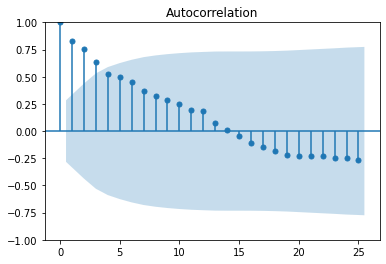

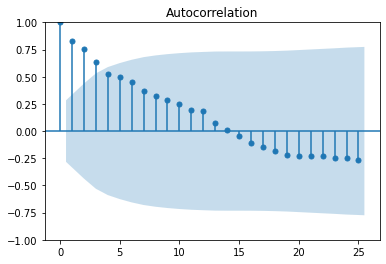

In [63]:
from statsmodels.graphics.tsaplots import plot_acf, plot_acf

pacf = plot_acf(df['Actuals'], lags=25)
acf = plot_acf(df['Actuals'], lags=25)

In [59]:
# split Data
x = df
train = x[:len(x)-9]
test = x[len(x)-9:]

In [60]:
model = AutoReg(train, lags=10).fit()

C:\anaconda3\envs\test2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [65]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                Actuals   No. Observations:                   39
Model:                    AutoReg(10)   Log Likelihood                -346.131
Method:               Conditional MLE   S.D. of innovations          36924.219
Date:                Fri, 22 Jul 2022   AIC                            716.263
Time:                        14:31:45   BIC                            732.670
Sample:                            10   HQIC                           721.401
                                   39                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7504.7815   5.47e+04     -0.137      0.891   -1.15e+05    9.97e+04
Actuals.L1      0.6323      0.189      3.345      0.001       0.262       1.003
Actuals.L2      0.2008      0.215      0.933    

In [66]:
print(len(train))

39


In [68]:
pred = model.predict(start=len(train), end=len(x)-1, dynamic=False)

C:\anaconda3\envs\test2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\anaconda3\envs\test2\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


39    290337.271086
40    298039.373857
41    366071.126968
42    377137.031789
43    412182.633362
44    437140.335968
45    442378.571557
46    462970.539955
47    506722.574703
dtype: float64


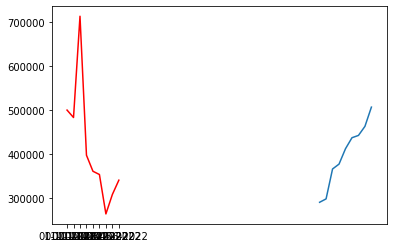

In [70]:
plt.plot(pred)
plt.plot(test, color = 'red')
print(pred)

In [71]:
#Calculate Error

from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, pred))

In [72]:
print(rmse)

180223.77824163515


In [74]:
#making future predictions
pred_future=model.predict(start=len(x)+1, end=len(x)+7, dynamic=False)
print("Future Prediction")
print(pred_future)
print('number of predictions made:\t', len(pred_future))

Future Prediction
49    510782.757000
50    549319.739707
51    568845.104696
52    602695.551026
53    640570.383428
54    664463.057166
55    704357.674252
dtype: float64
number of predictions made:	 7


C:\anaconda3\envs\test2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\anaconda3\envs\test2\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
